Import Required Libraries

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


Load Dataset

In [22]:
df = pd.read_csv("/content/SampleSuperstore.csv", encoding="latin1")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Basic EDA (Exploratory Data Analysis)

In [23]:
df.shape


(9994, 13)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [25]:
df.describe()


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


EDA Visualizations

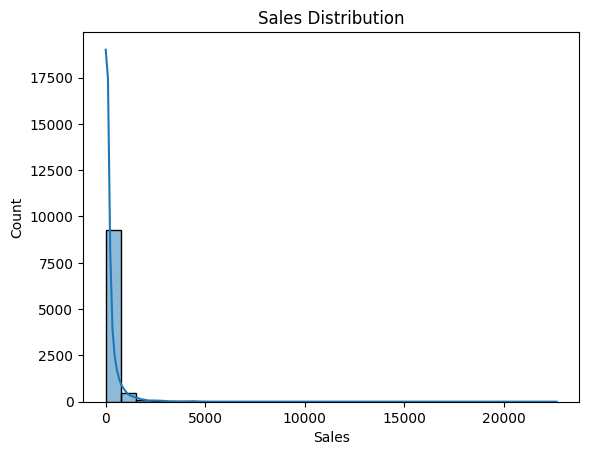

In [26]:
plt.figure()
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()


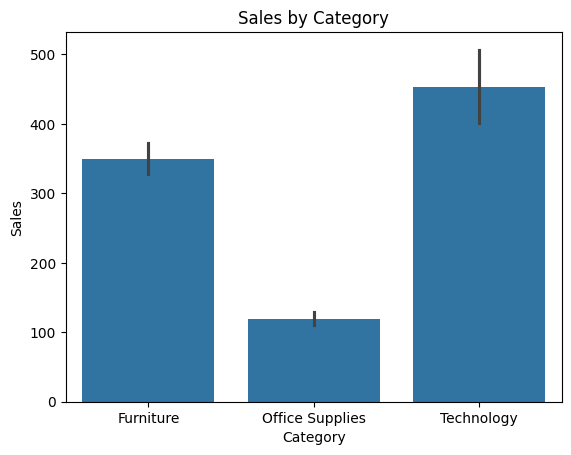

In [27]:
plt.figure()
sns.barplot(x='Category', y='Sales', data=df)
plt.title("Sales by Category")
plt.show()


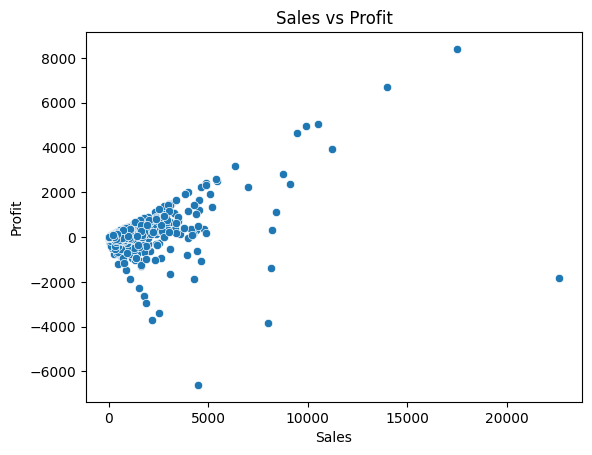

In [28]:
plt.figure()
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()


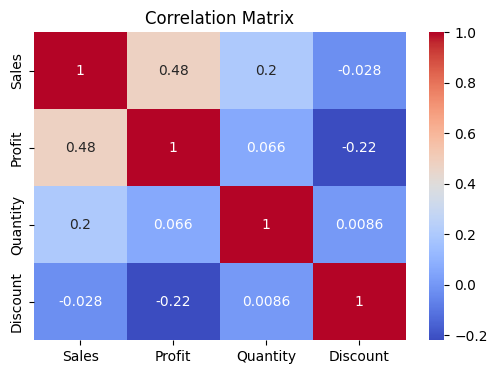

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales','Profit','Quantity','Discount']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Feature Selection

In [30]:
df_model = df[['Ship Mode','Segment','Category','Sub-Category',
               'Region','Quantity','Discount','Profit','Sales']]

One-Hot Encoding (Categorical → Numeric)

In [31]:
df_encoded = pd.get_dummies(df_model, drop_first=True)
df_encoded.head()


,Quantity,Discount,Profit,Sales,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Category_Office Supplies,...,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables,Region_East,Region_South,Region_West
0,2,0.00,41.9136,261.9600,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3,0.00,219.5820,731.9400,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2,0.00,6.8714,14.6200,False,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
3,5,0.45,-383.0310,957.5775,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
4,2,0.20,2.5164,22.3680,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False


Split Features & Target

In [32]:
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']


Train-Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Feature Scaling

In [34]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Build ANN Model Architecture

In [35]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile ANN Model

In [36]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)


Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 465902.5312 - val_loss: 197650.6562
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 276391.3125 - val_loss: 162386.7969
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 255647.7656 - val_loss: 141277.5625
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 256276.5938 - val_loss: 123921.3516
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 146093.8281 - val_loss: 99678.2500
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 130564.1172 - val_loss: 84695.5234
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 91629.1719 - val_loss: 74928.6016
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 67443.7969 - val_loss: 70702.5625
Epoch 9/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69647.2891 - val_loss: 68465.8828
Epoch 10/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69149.0781 - val_loss: 67405.0156
Epoch 11/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

Prediction on Test Data

In [ ]:
y_pred = model.predict(X_test)


Model Evaluation

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)
